# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [2]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,0.0,0.0
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,0.0,0.0
2024-03-22 00:00:00-04:00,5242.479980,5246.089844,5229.870117,5234.180176,3374700000,0.0,0.0
2024-03-25 00:00:00-04:00,5219.520020,5229.089844,5216.089844,5218.189941,3331360000,0.0,0.0
2024-03-26 00:00:00-04:00,5228.850098,5235.160156,5203.419922,5203.580078,3871790000,0.0,0.0


In [3]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [4]:
dfo

yfinance.Ticker object <^SPX>

In [5]:
dfo.options  #to get the date of different expiration time

('2024-03-27',
 '2024-03-28',
 '2024-04-01',
 '2024-04-02',
 '2024-04-03',
 '2024-04-04',
 '2024-04-05',
 '2024-04-08',
 '2024-04-09',
 '2024-04-10',
 '2024-04-11',
 '2024-04-12',
 '2024-04-15',
 '2024-04-16',
 '2024-04-17',
 '2024-04-18',
 '2024-04-19',
 '2024-04-22',
 '2024-04-23',
 '2024-04-24',
 '2024-04-25',
 '2024-04-26',
 '2024-04-29',
 '2024-04-30',
 '2024-05-01',
 '2024-05-02',
 '2024-05-03',
 '2024-05-10',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-07-31',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [6]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp

Options(calls=          contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0    SPXW240327C01400000 2024-02-27 18:55:00+00:00  1400.0    3667.70  3829.9   
1    SPXW240327C02200000 2024-02-27 18:55:01+00:00  2200.0    2871.00  3030.0   
2    SPXW240327C04250000 2024-03-25 16:35:37+00:00  4250.0     977.72   980.5   
3    SPXW240327C04400000 2024-03-19 19:17:47+00:00  4400.0     772.73   830.7   
4    SPXW240327C04450000 2024-03-20 14:05:34+00:00  4450.0     733.31   781.0   
..                   ...                       ...     ...        ...     ...   
137  SPXW240327C05575000 2024-03-26 13:30:04+00:00  5575.0       0.05     0.0   
138  SPXW240327C05600000 2024-03-22 18:42:22+00:00  5600.0       0.10     0.0   
139  SPXW240327C05700000 2024-03-21 13:50:51+00:00  5700.0       0.05     0.0   
140  SPXW240327C05800000 2024-03-14 14:02:03+00:00  5800.0       0.07     0.0   
141  SPXW240327C06000000 2024-02-29 19:01:50+00:00  6000.0       0.08     0.0   

         ask 

In [7]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240328C00800000,2024-03-26 17:33:53+00:00,800.0,4429.57,4423.7,4429.5,0.0,0.0,4.0,371,13.619142,True,REGULAR,USD
1,SPXW240328C01000000,2024-03-26 15:22:45+00:00,1000.0,4233.25,4223.8,4229.6,0.0,0.0,1.0,834,11.991458,True,REGULAR,USD
2,SPXW240328C01200000,2024-03-25 17:38:47+00:00,1200.0,4025.16,4024.2,4029.9,0.0,0.0,790.0,399,10.713626,True,REGULAR,USD
3,SPXW240328C01400000,2024-03-26 13:38:30+00:00,1400.0,3831.90,3824.1,3829.8,0.0,0.0,1.0,2792,9.617924,True,REGULAR,USD
4,SPXW240328C01600000,2024-03-25 17:02:14+00:00,1600.0,3625.30,3624.2,3629.9,0.0,0.0,134.0,68,8.694341,True,REGULAR,USD


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28 00:00:00-04:00,4541.089844,4575.649902,4517.689941,4575.520020,4312260000,0.0,0.0
2022-03-29 00:00:00-04:00,4602.859863,4637.299805,4589.660156,4631.600098,5085910000,0.0,0.0
2022-03-30 00:00:00-04:00,4624.200195,4627.770020,4581.319824,4602.450195,4385570000,0.0,0.0
2022-03-31 00:00:00-04:00,4599.020020,4603.069824,4530.410156,4530.410156,4823020000,0.0,0.0
2022-04-01 00:00:00-04:00,4540.319824,4548.700195,4507.569824,4545.859863,4562940000,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-19 00:00:00-04:00,5139.089844,5180.310059,5131.589844,5178.509766,4031760000,0.0,0.0
2024-03-20 00:00:00-04:00,5181.689941,5226.189941,5171.549805,5224.620117,4064850000,0.0,0.0
2024-03-21 00:00:00-04:00,5253.430176,5261.100098,5240.660156,5241.529785,4207730000,0.0,0.0


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [8]:
import math
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """
    s=df['Close']
    log_return = np.log(s/s.shift(1))
    log_return = log_return.dropna()
    daily_vol = np.std(log_return)
    vol =daily_vol*math.sqrt(252)

    return vol

In [9]:
s1=df['Close']
log_returns=np.log(s1/s1.shift(1))


In [10]:
log_returns=log_returns.dropna()

In [11]:
volt=np.std(log_returns)*math.sqrt(252)
volt

0.18419931546634266

In [12]:
vol = annual_vol(df)
vol

0.18419931546634266

# **BLACK-SCHOLES MODEL**


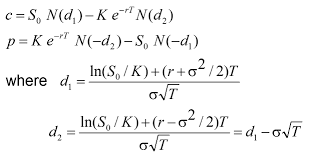

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [22]:
from scipy.stats import norm
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """
    d1=(np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*(T**(0.5)))
    d2=d1-sigma*(T**(0.5))
    c=S*norm.cdf(d1)-K*math.exp(-r*T)*norm.cdf(d2)
    p=K*math.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
    if option=='call':
      return c
    else:
      return p


   #your code here

In [23]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [24]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
800.0,4403.580125
1000.0,4203.580137
1200.0,4003.580149
1400.0,3803.580161
1600.0,3603.580173


In [16]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
800.0,4429.57
1000.0,4233.25
1200.0,4025.16
1400.0,3831.90
1600.0,3625.30


In [25]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
800.0,4403.580125,4429.57
1000.0,4203.580137,4233.25
1200.0,4003.580149,4025.16
1400.0,3803.580161,3831.90
1600.0,3603.580173,3625.30
1700.0,3503.580179,2456.58
1800.0,3403.580184,2556.90
1900.0,3303.580190,2460.20
2000.0,3203.580196,3233.00
2100.0,3103.580202,2181.61


<Axes: >

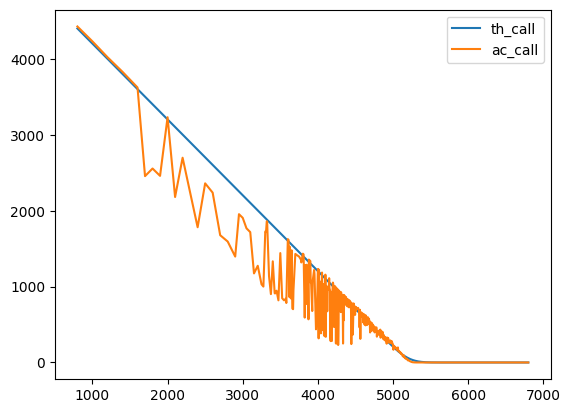

In [26]:
call.plot() #plotting the actual and theoretical call prices

In [28]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
800.0,0.0
1000.0,0.0
1200.0,0.0
1400.0,0.0
1600.0,0.0


In [29]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
800.0,0.05
1000.0,0.05
1200.0,0.05
1400.0,0.03
1600.0,0.03


In [30]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5700.0,496.435629,865.38
5750.0,546.424018,856.08
5800.0,596.420656,981.13
5900.0,696.419536,907.21
6000.0,796.419469,766.58
6200.0,996.419451,969.69
6300.0,1096.419444,1120.45
6400.0,1196.419436,1170.34
6600.0,1396.419421,1364.11
6800.0,1596.419406,1570.20


<Axes: >

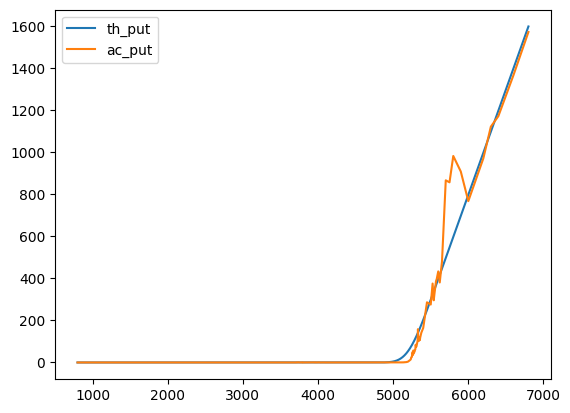

In [31]:
put.plot()